In [43]:
import defdap
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
import math
import numpy as np
%matplotlib inline
from defdap import quat
from defdap import ebsd
from defdap import hrdic
from defdap.plotting import MapPlot

In [44]:
output ="../results/combined/"

In [58]:
DicFilePath = "../HRDIC/DIC_data/A3/zone_1/take 3/" #A3_zone1
#DicFilePath = "../HRDIC/DIC_data/A3/zone_2/take3/" #A3_zone2
#DicFilePath = "../DIC_data/A3/zone_3/take 3/" #A3_zone2
#DicFilePath = "../DIC_data/B2/take 2/" #B2_zone1

In [59]:
n = 16
if n <10:
    DicMap = hrdic.Map(DicFilePath, "B0000{}.txt".format(n))
else:
    DicMap = hrdic.Map(DicFilePath, "B000{}.txt".format(n))

Loaded DaVis 8.4.0 data (dimensions: 2075 x 2158 pixels, sub-window size: 12 x 12 pixels)


In [60]:
Displacement = DicMap.xd.reshape(np.shape(DicMap))
Position = DicMap.xc.reshape(np.shape(DicMap))

In [61]:
strain_list=[]
crop = 80
row = 20
displacement = np.mean(Displacement[crop:-crop,crop:row+crop])- np.mean(Displacement[crop:-crop,-crop-row:-crop])
position = np.mean(Position[crop:-crop,crop:row+crop])- np.mean(Position[crop:-crop,-crop-row:-crop])
strain_list.append(abs(displacement)/abs(position))
strain_list

[0.02871945887950395]

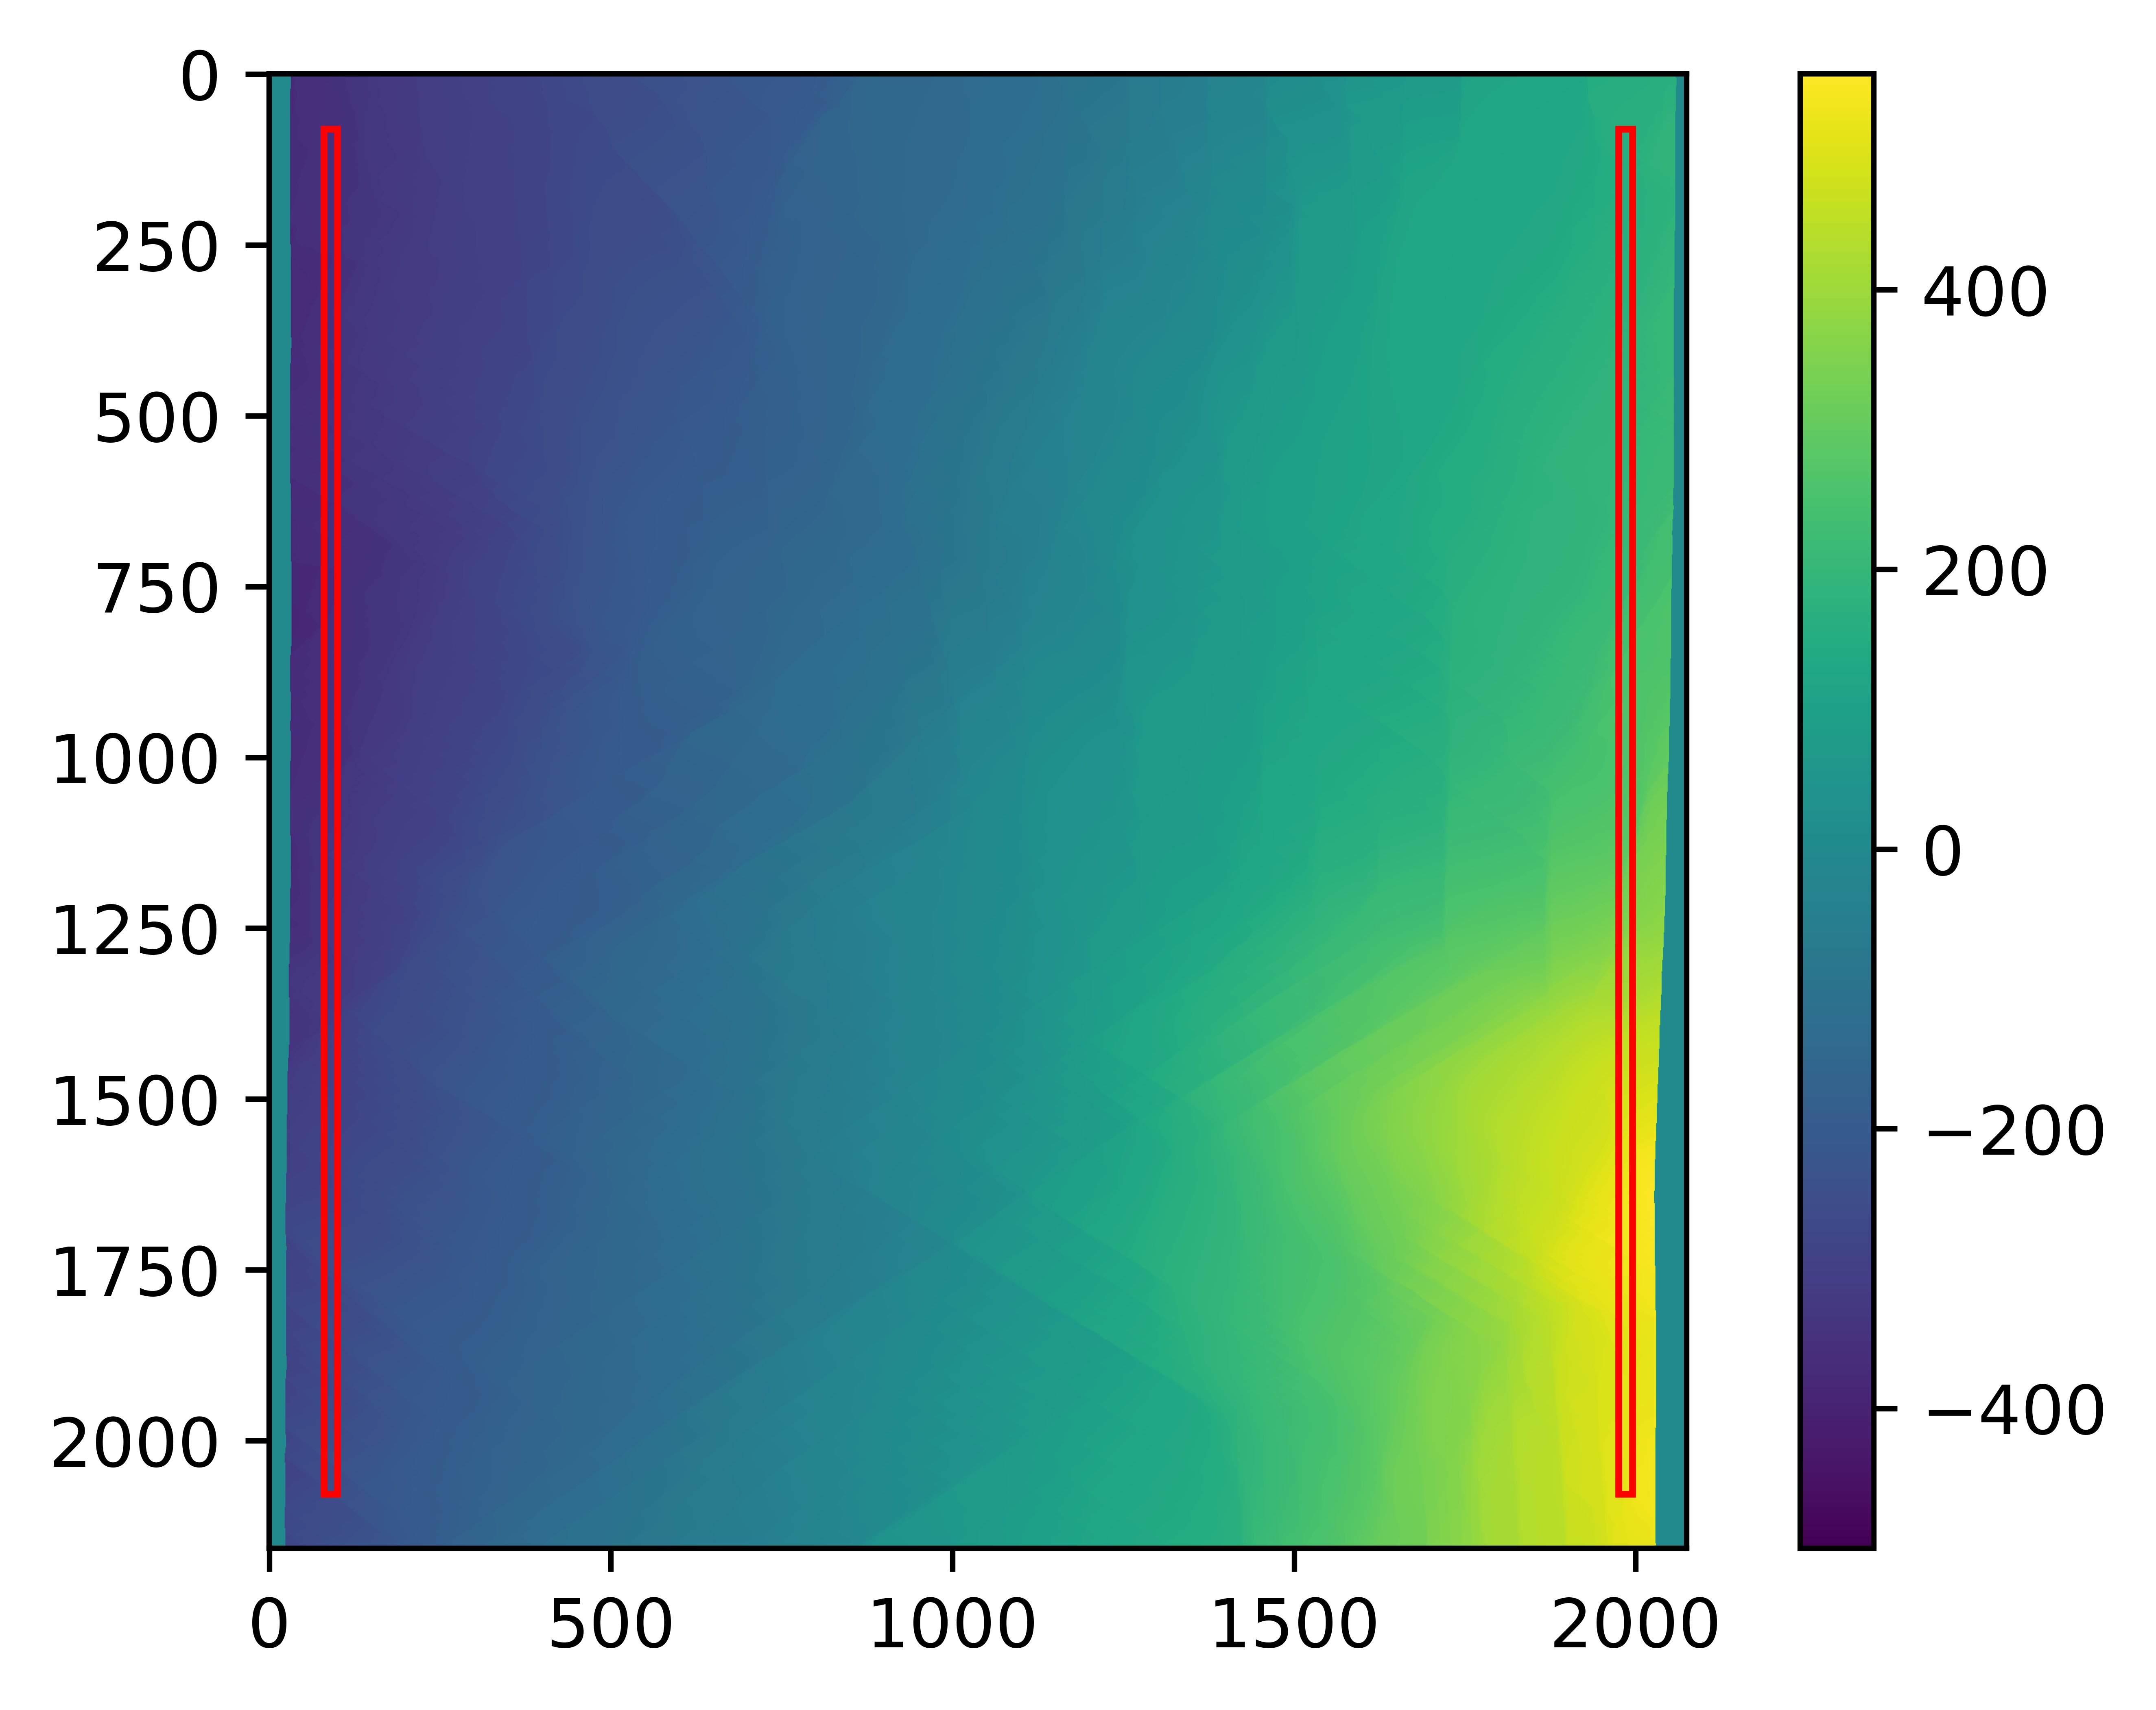

In [65]:
plt.figure(dpi=1200)
plt.imshow(Displacement[:,:],cmap='viridis',vmin=-500)
#plt.imshow(Displacement[crop:-crop,crop:-crop])
# Define rectangle patches
rect1 = Rectangle((crop, crop), row, Displacement.shape[0] - 2*crop, linewidth=1, edgecolor='r', facecolor='none')  # Rectangle 1
rect2 = Rectangle((Displacement.shape[1] - crop - row, crop), row, Displacement.shape[0] - 2*crop, linewidth=1, edgecolor='r', facecolor='none')  # Rectangle 2

# Add rectangles to the plot
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
plt.colorbar() 
plt.savefig('../results/macro_validated/A3_zone1/displacemnt_MAP.png', bbox_inches='tight')
plt.show()

In [8]:
#A3 1,20
#B2 1,17
strain_list=[]
crop = 80
row = 20
for n in range(1,17):
    if n <10:
        DicMap = hrdic.Map(DicFilePath, "B0000{}.txt".format(n))
        Displacement = DicMap.xd.reshape(np.shape(DicMap))
        Position = DicMap.xc.reshape(np.shape(DicMap))
        print(n)
        displacement = np.mean(Displacement[crop:-crop,crop:row+crop])- np.mean(Displacement[crop:-crop,-crop-row:-crop])
        position = np.mean(Position[crop:-crop,crop:row+crop])- np.mean(Position[crop:-crop,-crop-row:-crop])
        strain_list.append(abs(displacement)/abs(position))    
    else:
        DicMap = hrdic.Map(DicFilePath, "B000{}.txt".format(n))
        Displacement = DicMap.xd.reshape(np.shape(DicMap))
        Position = DicMap.xc.reshape(np.shape(DicMap))
        print(n)
        displacement = np.mean(Displacement[crop:-crop,crop:row+crop])- np.mean(Displacement[crop:-crop,-crop-row:-crop])
        position = np.mean(Position[crop:-crop,crop:row+crop])- np.mean(Position[crop:-crop,-crop-row:-crop])
        strain_list.append(abs(displacement)/abs(position))    
strain_list
    

Loaded DaVis 8.4.0 data (dimensions: 2169 x 2128 pixels, sub-window size: 12 x 12 pixels)
1
Loaded DaVis 8.4.0 data (dimensions: 2169 x 2128 pixels, sub-window size: 12 x 12 pixels)
2
Loaded DaVis 8.4.0 data (dimensions: 2169 x 2128 pixels, sub-window size: 12 x 12 pixels)
3
Loaded DaVis 8.4.0 data (dimensions: 2169 x 2128 pixels, sub-window size: 12 x 12 pixels)
4
Loaded DaVis 8.4.0 data (dimensions: 2169 x 2128 pixels, sub-window size: 12 x 12 pixels)
5
Loaded DaVis 8.4.0 data (dimensions: 2169 x 2128 pixels, sub-window size: 12 x 12 pixels)
6
Loaded DaVis 8.4.0 data (dimensions: 2169 x 2128 pixels, sub-window size: 12 x 12 pixels)
7
Loaded DaVis 8.4.0 data (dimensions: 2169 x 2128 pixels, sub-window size: 12 x 12 pixels)
8
Loaded DaVis 8.4.0 data (dimensions: 2169 x 2128 pixels, sub-window size: 12 x 12 pixels)
9
Loaded DaVis 8.4.0 data (dimensions: 2169 x 2128 pixels, sub-window size: 12 x 12 pixels)
10
Loaded DaVis 8.4.0 data (dimensions: 2169 x 2128 pixels, sub-window size: 12 x 

[0.0001631916457665641,
 0.0005207427374524602,
 0.0010265798177557018,
 0.0030399995883737584,
 0.0036922239117313242,
 0.004494610439139523,
 0.005060925441384254,
 0.00569814765104586,
 0.006744115236591735,
 0.008417578037288589,
 0.010564347115542154,
 0.013936050737133504,
 0.018728853573124406,
 0.024325618123808655,
 0.030245433905790795,
 0.03507967422832694]

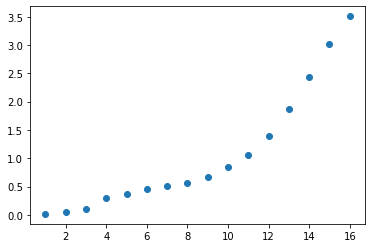

In [9]:
plt.scatter(range(1,len(strain_list)+1),np.array(strain_list)*100)

In [10]:
#np.save("e11_B2_zone1.npy",strain_list)

In [33]:
e11_a3_zone1 = np.load('e11_A3_zone1.npy')
e11_a3_zone2 = np.load('e11_A3_zone2.npy')
e11_a3_zone3 = np.load('e11_A3_zone3.npy')
e11_b2_zone1 = np.load('e11_B2_zone1.npy')
steps = np.arange(19)

In [12]:
e11_a3_zone1[14]*100

2.4343826788529954

In [13]:
step_value = []
for i in range(0,14):
    step_value.append(int(e11_b2_zone1[i]*10000))
step_value

[1, 3, 7, 14, 33, 41, 50, 57, 65, 79, 105, 133, 165, 196]

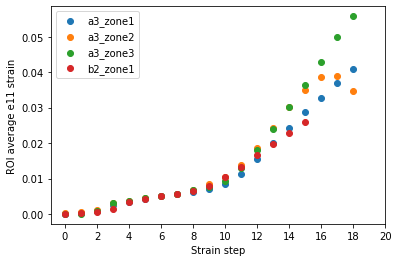

In [14]:
plt.figure()
plt.scatter(steps,e11_a3_zone1,label='a3_zone1')
plt.scatter(steps,e11_a3_zone2,label='a3_zone2') # values go down as DIC pattern is failed to register at step 16 and on wards
plt.scatter(steps,e11_a3_zone3,label='a3_zone3')
plt.scatter(steps[:16],e11_b2_zone1,label='b2_zone1')
plt.xlabel('Strain step')
plt.xticks(np.arange(0, 21, 2))

plt.ylabel('ROI average e11 strain')
plt.legend()

In [14]:
stress_strain_path = ("../HRDIC/mechanical_testing_data/")

In [15]:
exp_stress_strain_b2 = pd.read_csv(stress_strain_path + "A3.csv") #this is not a mistake
exp_stress_strain_a3 = pd.read_csv(stress_strain_path + "Sample B2.csv") # this is not a mistake

In [16]:
extension_b2 = exp_stress_strain_b2['Elongation (µm)'].values
force_b2 = exp_stress_strain_b2['Force (N)'].values
extension_a3 = exp_stress_strain_a3['Elongation (µm)'].values
force_a3 = exp_stress_strain_a3['Force (N)'].values

In [17]:
width  = 3    /1000 #mm -> m
depth  = 1.75 /1000 #mm -> m
length = 10   *1000 #mm -> um

area = width * depth
exp_eng_stress_b2 = force_b2 / (area * 1000000)
exp_eng_stress_a3 = force_a3 / (area * 1000000)
#exp_eng_strain = extension /length

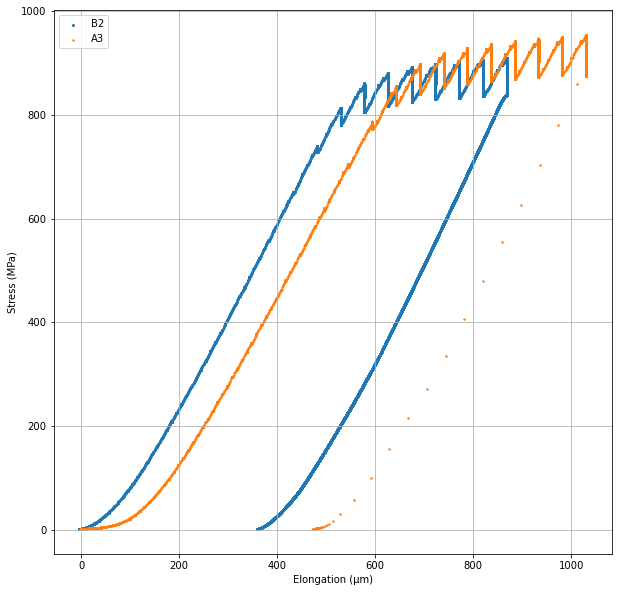

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(extension_b2,exp_eng_stress_b2,s=4,label='B2')
plt.scatter((extension_a3),exp_eng_stress_a3,s=2,label='A3')

plt.ylabel("Stress (MPa)")
plt.xlabel("Elongation (µm)")
plt.grid()
#plt.xlim(400,800)
#plt.ylim(800,900)
plt.legend()
#plt.savefig(output_path + 'extension_force.png')

In [19]:
extension_at_image_b2 = [0,36,85,135,284, 333,382,431,480,529, 577,625, 674, 723,771,819,868] # a3 named from tanist
force_at_image_b2 = [11,91,333,684,1985, 2461,2938,3417,3882,4271, 4518,4625, 4683, 4717,4742,4760,4773] # a3 named from tanist

extension_at_image_a3 = [0,50,99,149,298, 347,397,446,496,544, 594,642,691,740, 788, 836,884,933,981,1029] #b2 named from tanist
force_at_image_a3 = [10,30,113,332,1451, 1896,2342,2791,3250,3707, 4131,4495,4714,4823, 4860, 4915,4946,4974,4988,5009] # b2 named from tanist

In [20]:
exp_eng_stress_at_image_b2 = np.array(force_at_image_b2) / (area * 1000000)
exp_eng_stress_at_image_a3 = np.array(force_at_image_a3) / (area * 1000000)

In [25]:
exp_eng_stress_at_image_a3[11]

856.190476190476

In [ ]:
3500 / (area * 1000000)
exp_eng_stress_at_image_a3[11
                        
                          ]

NameError: name 'extension_b2' is not defined

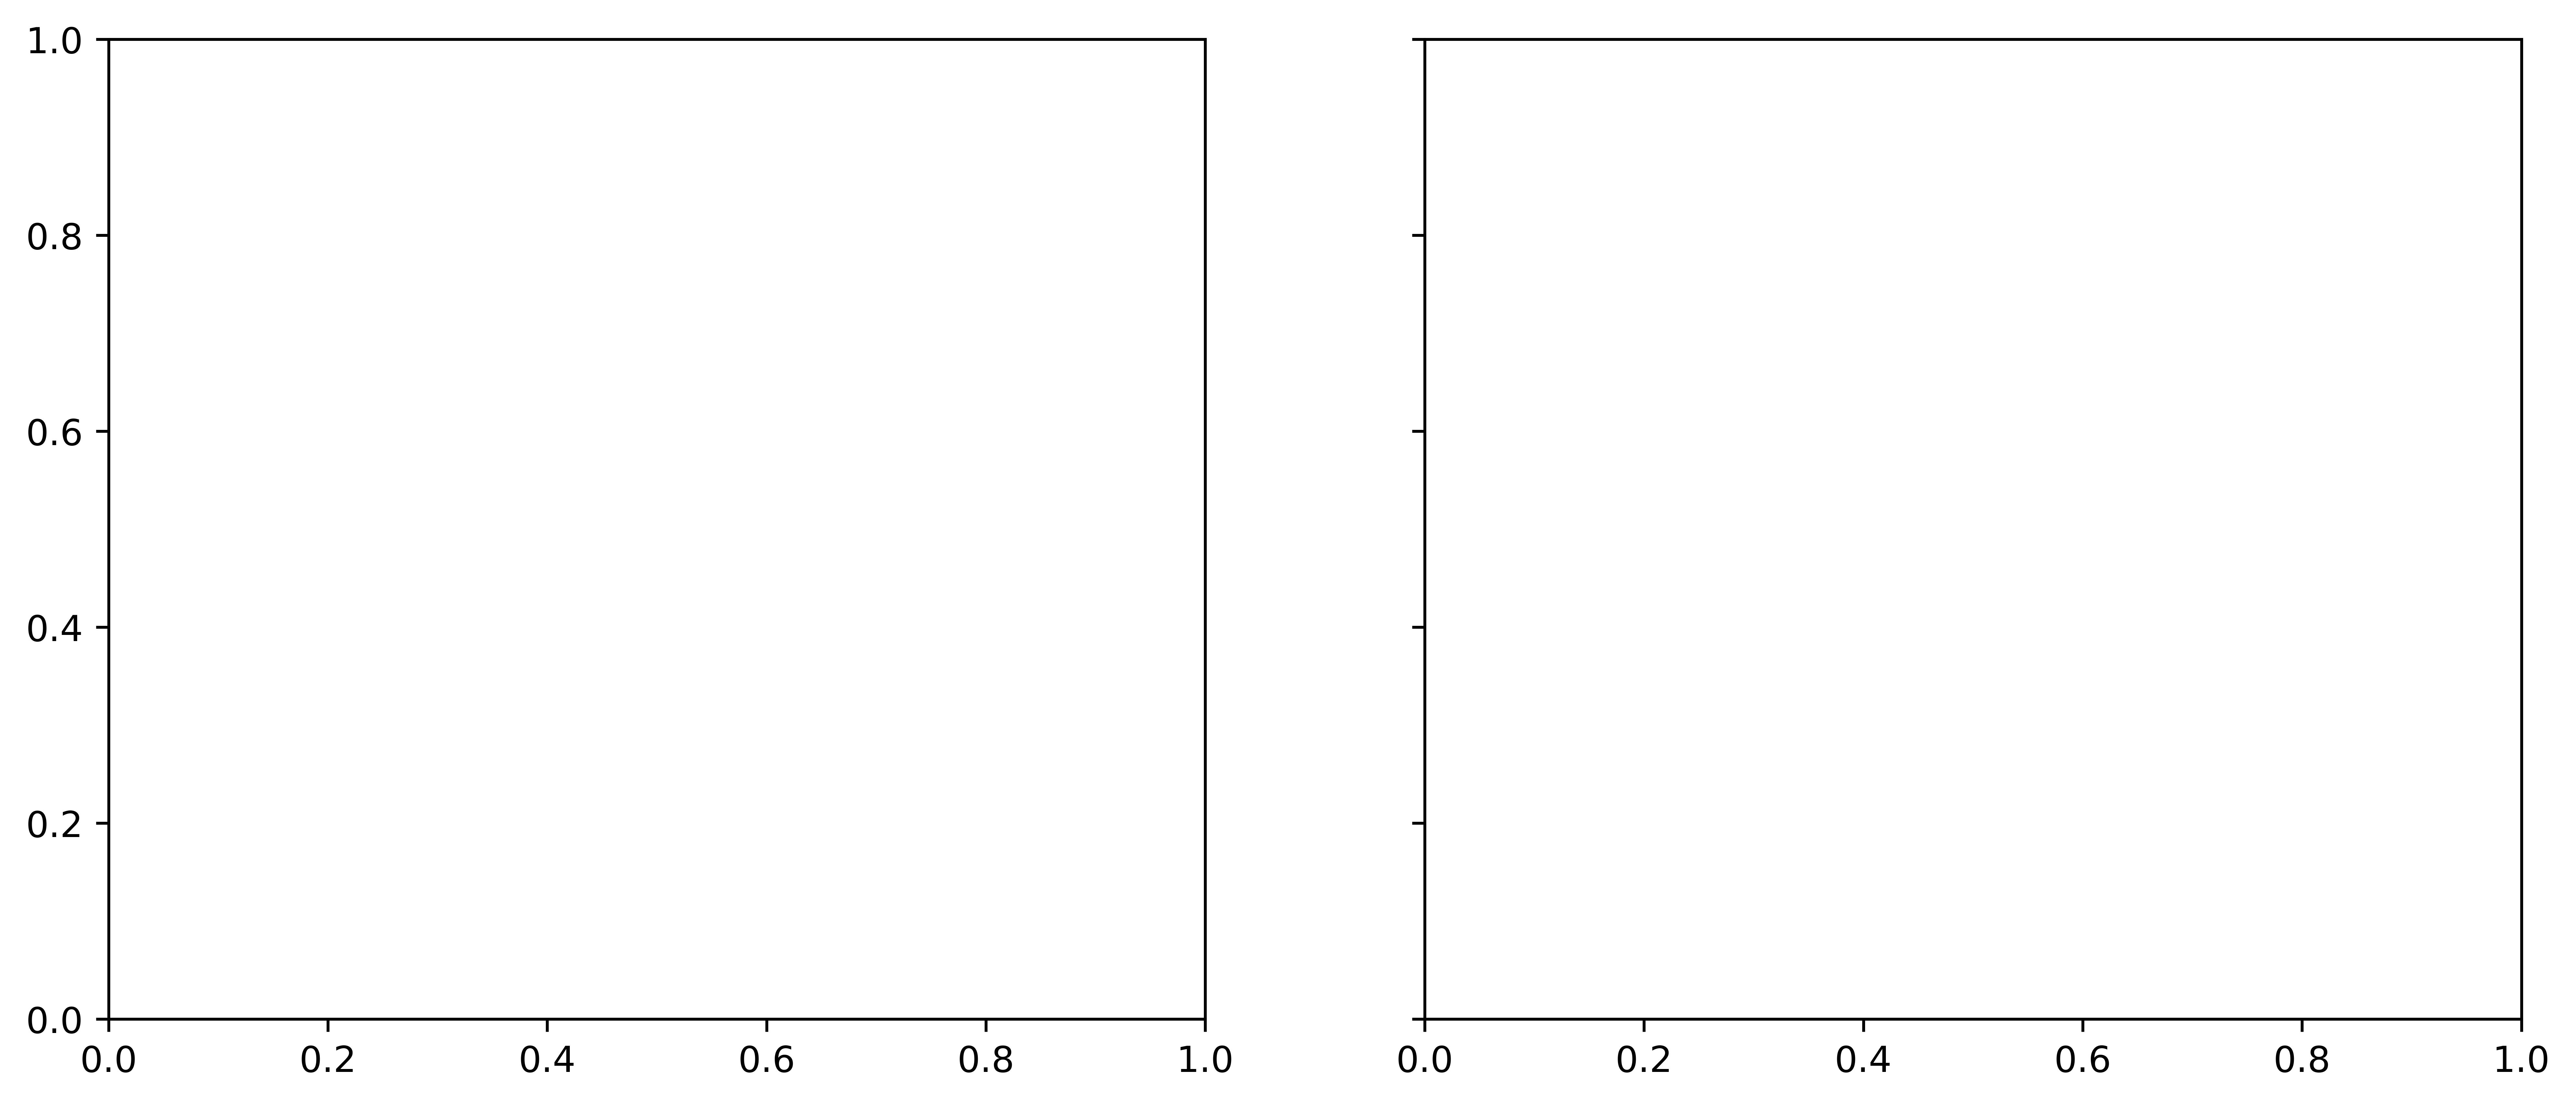

In [9]:
#plt.figure(figsize=(12,5))
#plt.subplot(1, 2, 1)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True,dpi=800)

axes[0].scatter(extension_b2,force_b2,s=2,label='B2')
axes[0].scatter(extension_at_image_b2,force_at_image_b2,label = 'B2 images')
axes[0].set_xlim(0,1100)
axes[0].legend()
axes[0].set_ylabel("Force (N)")
axes[0].set_xlabel("Elongation (µm)")


axes[1].scatter((extension_a3),force_a3,s=2,label='A3')
axes[1].scatter(extension_at_image_a3,force_at_image_a3,label = 'A3 images')
axes[1].legend()
axes[1].set_xlim(0,1100)
axes[1].set_xlabel("Elongation (µm)")

In [70]:
#0.2% proof stress
j=9
m=4
m = (exp_eng_stress_at_image_a3[j]-exp_eng_stress_at_image_a3[m])/(e11_a3_zone1[j]-e11_a3_zone1[m])

c = m*(-0.002)
proof_s=[]
x=[]
    
i=0
while i < 0.015:
    proof_s.append(m*i+c)
    x.append(i)
    i += 0.0001
#print(x)

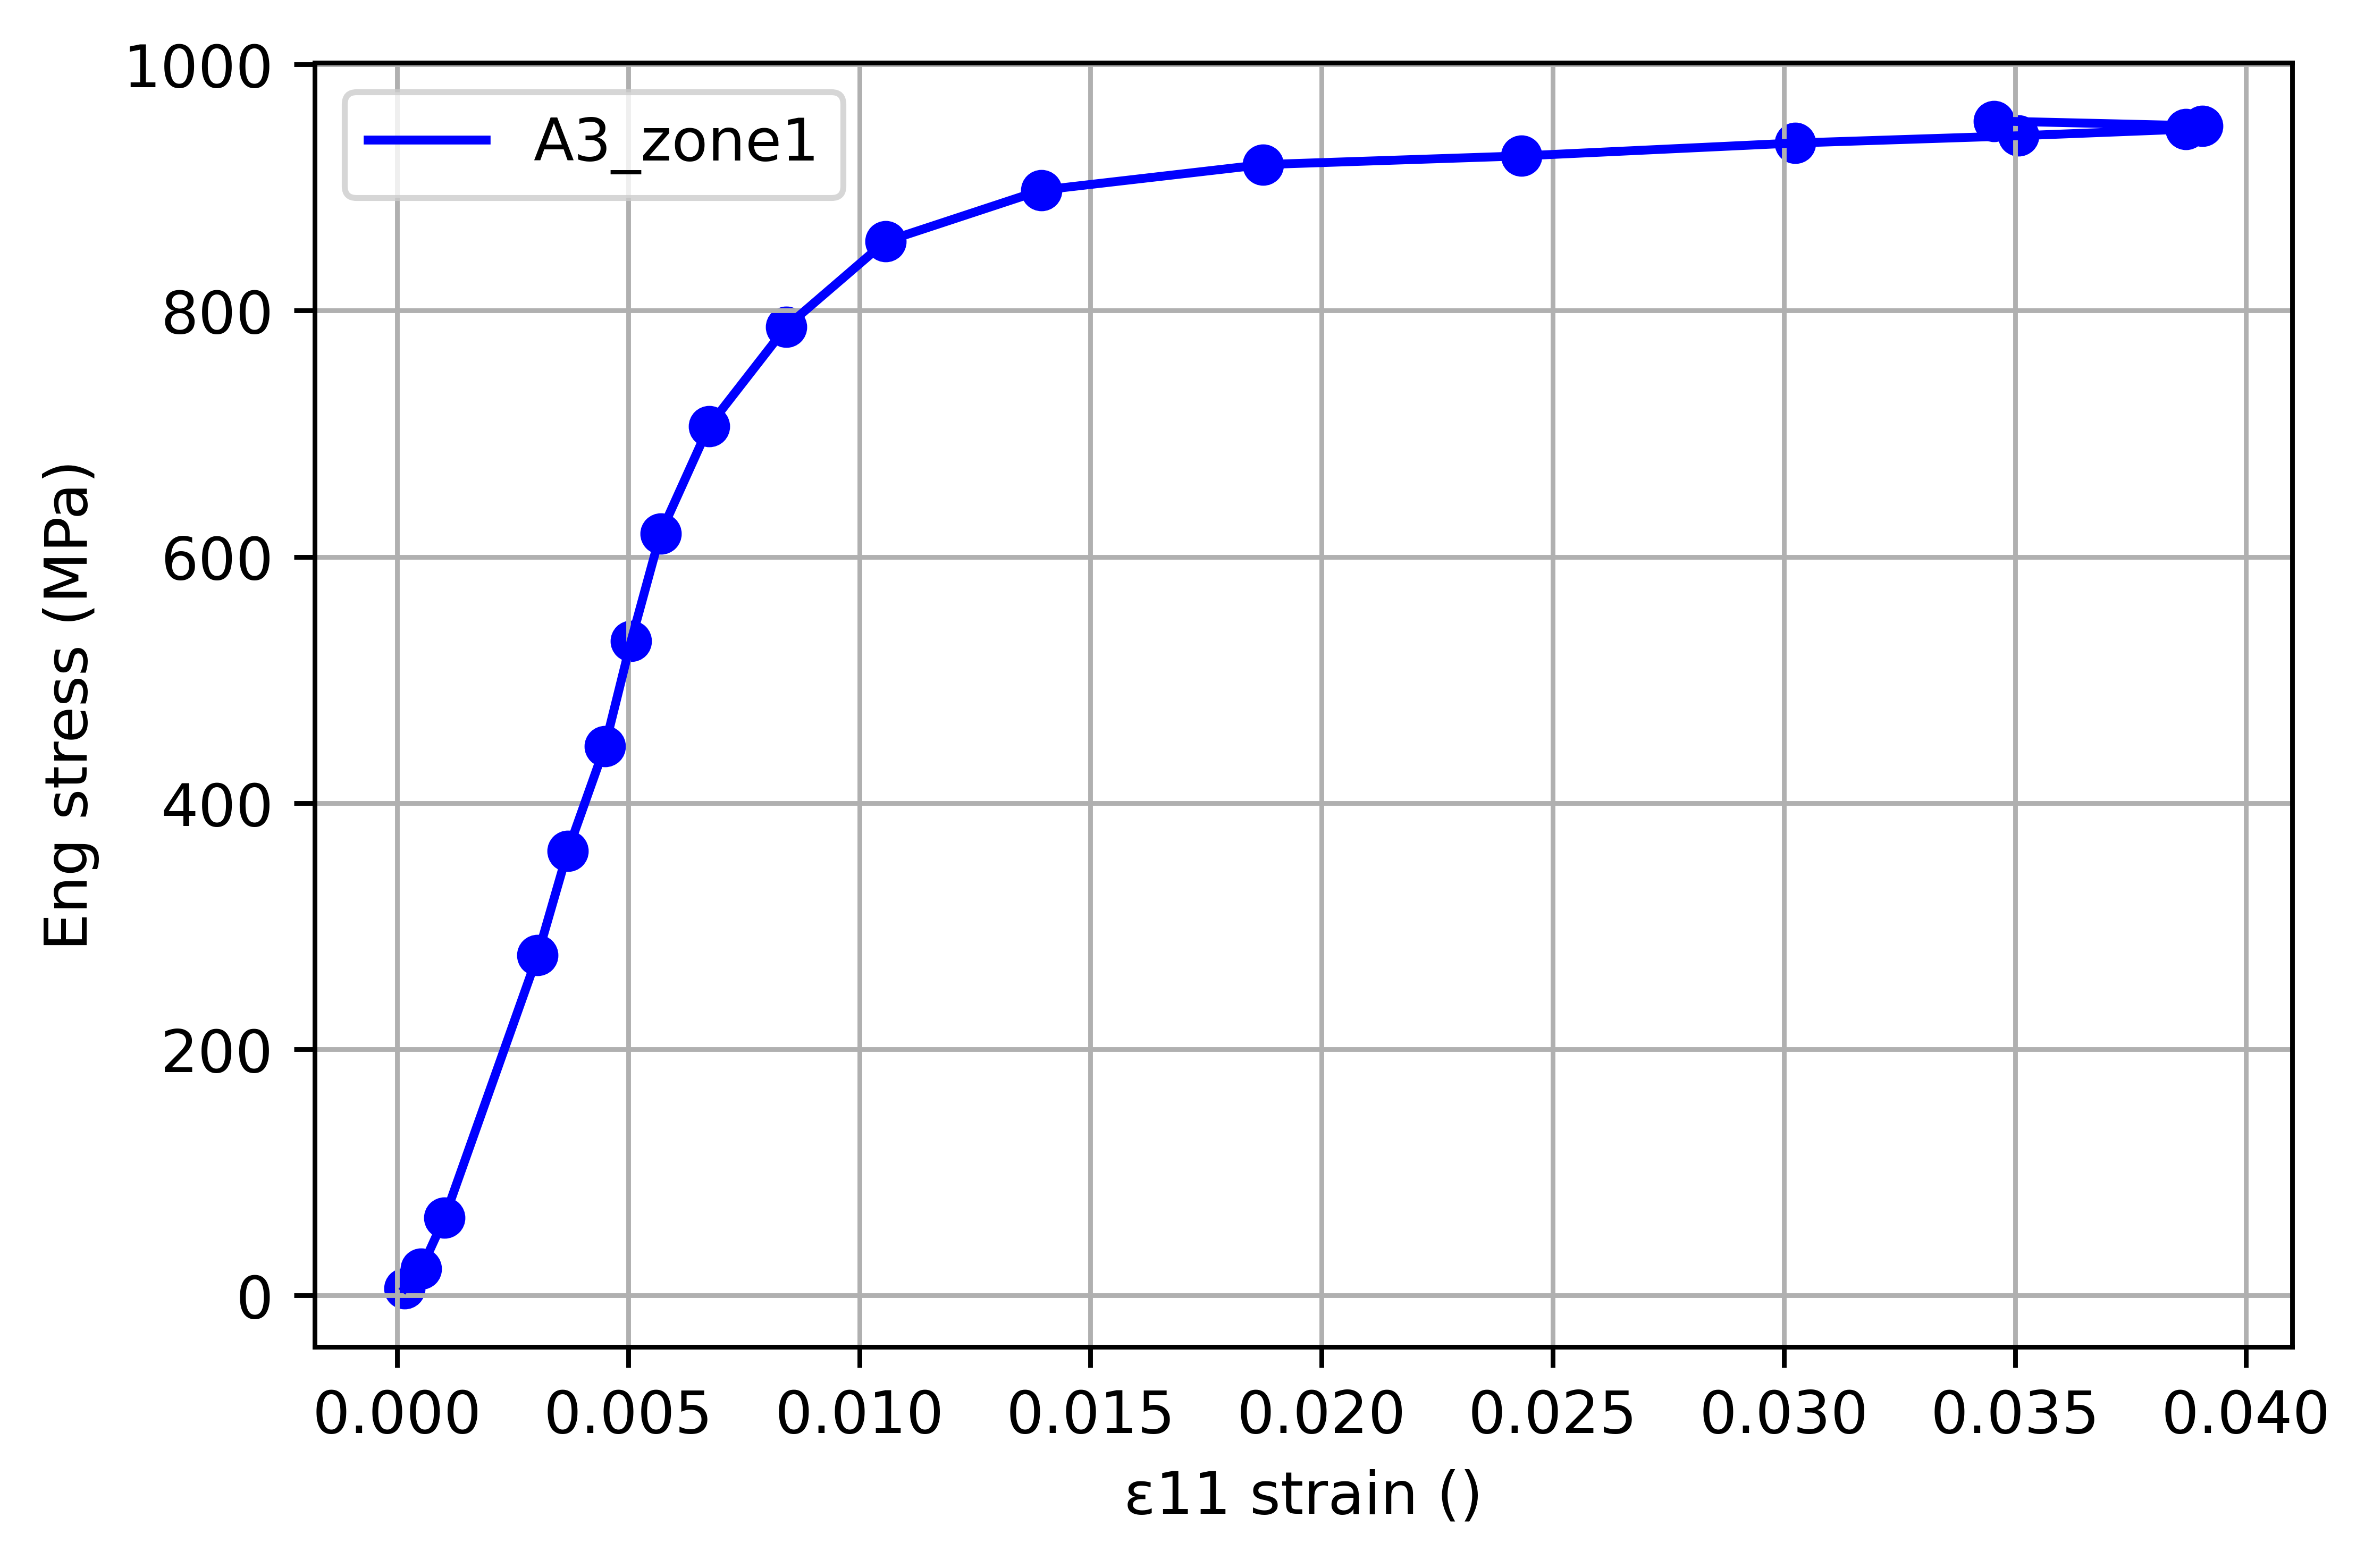

In [77]:
plt.figure(dpi=800)
#plt.plot(e11_b2_zone1,exp_eng_stress_at_image_b2[1:],label='B2_zone1')
plt.plot(e11_a3_zone2,exp_eng_stress_at_image_a3[1:],label='A3_zone1',color='b')
plt.scatter(e11_a3_zone2,exp_eng_stress_at_image_a3[1:],color='b')
#plt.plot(e11_a3_zone2,exp_eng_stress_at_image_a3[1:],label='A3_zone2')
#plt.plot(e11_a3_zone3,exp_eng_stress_at_image_a3[1:],label='A3_zone3')
#plt.plot(x,proof_s,label='Proof stress A3_zone1')
plt.xlabel('\u03B511 strain ()')
plt.ylabel('Eng stress (MPa)')
#plt.xlim(0.012,0.013)
#plt.ylim(900,910)
plt.grid()
plt.legend()
#plt.savefig(output + 'stress-strain')
# yield for A3_zone1 = 905MPa 

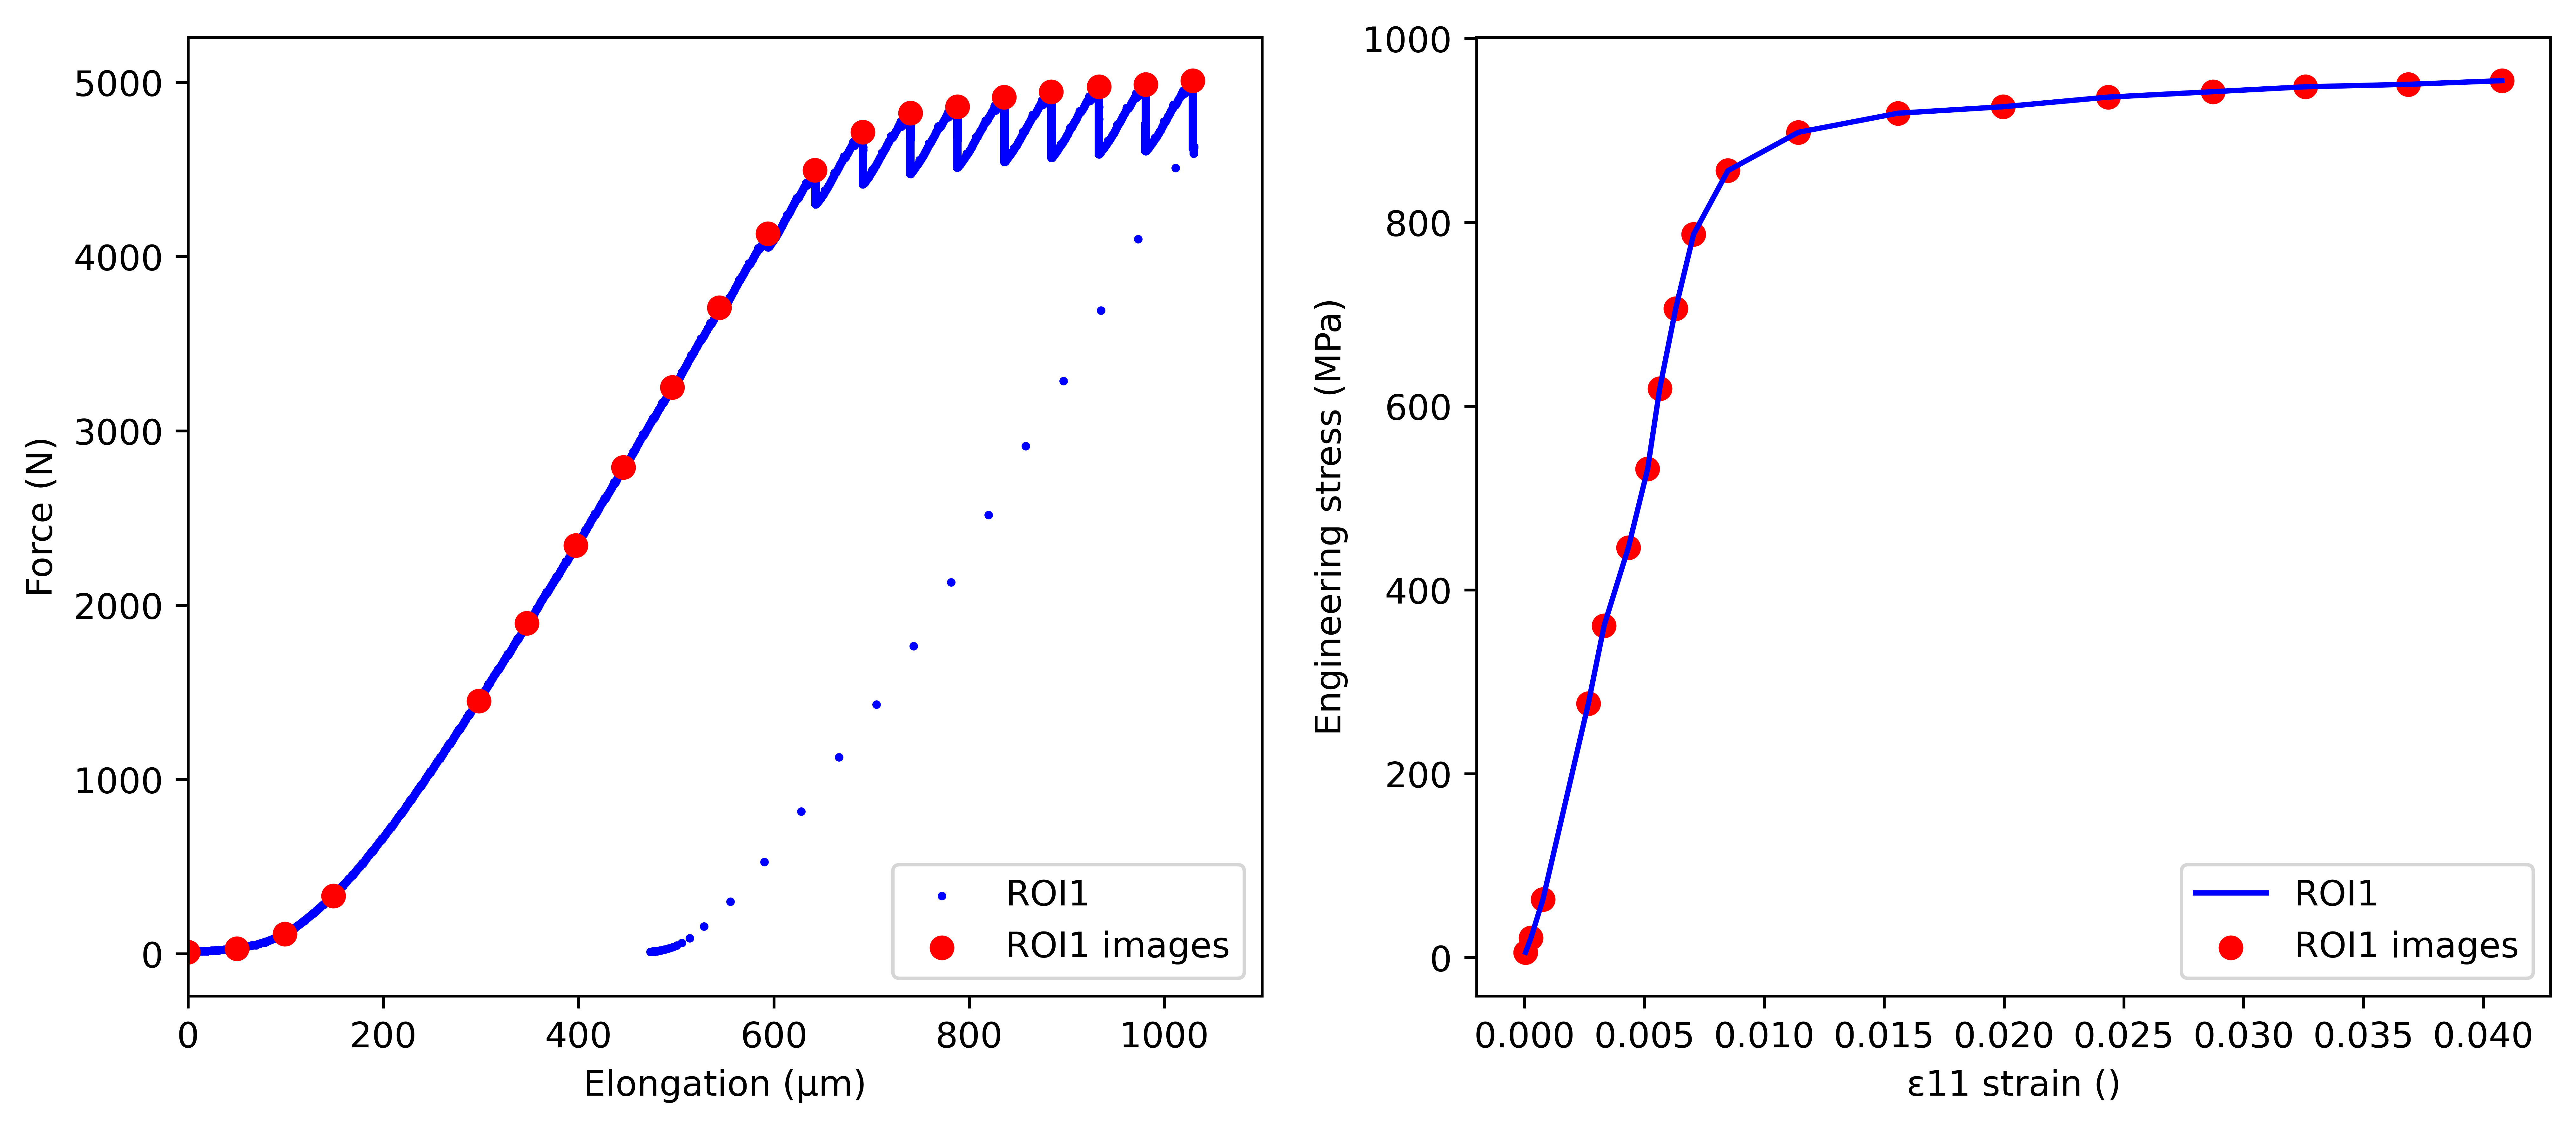

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=800)
axes[0].scatter((extension_a3),force_a3,s=2,label='ROI1',color='b')
axes[0].scatter(extension_at_image_a3,force_at_image_a3,label = 'ROI1 images',color='r')
axes[0].legend(loc='lower right')
axes[0].set_xlim(0,1100)
axes[0].set_xlabel("Elongation (µm)")
axes[0].set_ylabel("Force (N)")

axes[1].plot(e11_a3_zone1,exp_eng_stress_at_image_a3[1:],label='ROI1',color='b')
axes[1].scatter(e11_a3_zone1,exp_eng_stress_at_image_a3[1:],label='ROI1 images',color='r')
axes[1].legend()
axes[1].set_xlabel('\u03B511 strain ()')
axes[1].set_ylabel('Engineering stress (MPa)')

plt.savefig('../results/macro_validated/A3_zone1/force_displacemnt_Stress_strain.png', bbox_inches='tight')

In [ ]:
stress_at_step_a3[6]

In [43]:
exp_eng_stress_at_image_a3[6]

446.095238095238

# CRSS approximation 

In [20]:
stress_at_step_a3 = exp_eng_stress_at_image_a3[1:]
stress_at_step_b2 = exp_eng_stress_at_image_b2[1:]

In [21]:
stepp = 14 
print(stress_at_step_a3[stepp-1])#mpa
print(e11_a3_zone1[stepp-1]*100)#%

925.7142857142856
2.031441343755496


In [33]:
#slip_data_frame = pd.read_csv('Slip_activiation_A3_zone1.csv',skiprows=5)
#slip_data_frame = pd.read_csv('Slip_activiation_A3_zone2.csv',skiprows=5)
slip_data_frame = pd.read_csv('Slip_activiation_A3_zone3.csv',skiprows=5)



slip_data_frame

,Step,Grain,Slip system,Schmid factor,Notes
0,6.0,0.0,NaN,NaN,NaN
1,6.0,1.0,NaN,NaN,NaN
2,6.0,2.0,NaN,NaN,NaN
3,6.0,3.0,NaN,NaN,NaN
4,6.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...
236,14.0,22.0,NaN,NaN,NaN
237,14.0,23.0,NaN,NaN,NaN
238,14.0,24.0,NaN,NaN,NaN
239,14.0,25.0,NaN,NaN,NaN


In [34]:
step_grain_dict = {}

for step in range(0, 20):  # Assuming steps go from 6 to 14
    step_data = slip_data_frame[slip_data_frame['Step'] == step]
    grain_dict = {}
    for _, row in step_data.iterrows():
        if not pd.isnull(row['Slip system']) or not pd.isnull(row['Schmid factor']):
            grain_dict[int(row['Grain'])] = [row['Slip system'], row['Schmid factor']]
    if grain_dict:  # Only add to the dictionary if there's data for this step
        step_grain_dict[step] = grain_dict

# Displaying the constructed dictionary
print(step_grain_dict)


{6: {13: ['(0001)[-2110]', 0.47]}, 7: {13: ['(0001)[-2110]', 0.47], 22: ['ambig', nan]}, 8: {11: ['(0001)[-2110]', 0.48], 14: ['(01-10)[-2110]', 0.467], 15: ['(0001)[1-210]', 0.498]}, 9: {1: ['(10-11)[1-210]', 0.407], 7: ['(10-1-1)[1-210]', 0.43], 9: ['(1-100)[11-20]', 0.413], 11: ['(0001)[-2110]', 0.48], 12: ['ambig', nan], 14: ['(0-111)[-2110]', 0.474], 15: ['(0001)[1-210]', 0.498], 16: ['(0001)[1-210]', 0.496], 18: ['(0-111)[-2110]', 0.474], 20: ['ambig', nan], 22: ['ambig', nan], 24: ['(0-11-1)[-2110]', 0.473]}, 10: {0: ['(1-100)[11-20]', 0.419], 1: ['(1-100)[11-20]', 0.357], 6: ['(1-101)[11-20]', 0.464], 7: ['(1-101)[11-20]', 0.476], 8: ['(1-100)[11-20]', 0.413], 9: ['(0001)[-2110]', 0.309], 10: ['(1-100)[11-20]', 0.25], 12: ['(0001)[1-210]', 0.497], 16: ['(10-1-1)[11-23]', 0.316], 20: ['(01-10)[-2110]', 0.309]}, 11: {2: ['(10-1-1)[1-210]', 0.451], 3: ['(10-1-1)[1-210]', 0.452], 4: ['(1-101)[11-20]', 0.467], 5: ['(0001)[-2110]', 0.466], 10: ['ambig', nan], 16: ['(10-1-1)[11-23]', 

In [35]:
slip_activation = {}
for Step in range(0,20):
    try:
        slip_activation[Step] = {}
        for Grain in range(0,100):
            try:
                slip_system = []
                Slip_system_data=step_grain_dict[Step][Grain]
                if Slip_system_data[0] in ['(0001)[11-20]', '(0001)[1-210]', '(0001)[-2110]']:
                    slip_system.append('Basal')
                elif Slip_system_data[0] in ['(10-10)[1-210]', '(10-10)[-2110]', '(1-100)[11-20]']:
                    slip_system.append('Prismatic')
                elif Slip_system_data[0] in ['(1-101)[11-20]', '(1-10-1)[11-20]', '(10-1-1)[1-210]', '(10-1-1)[1-210]', '(0-111)[-2110]', '(0-11-1)[-2110]']:
                    slip_system.append('Pyramidal <a>')
                elif Slip_system_data[0] in ['(1-101)[-2113]', '(1-101)[-12-13]', '(1-10-1)[1-213]', '(1-10-1)[-12-13]', '(1-10-1)[-1-123]', '(10-11)[-2113]', '(10-1-1)[11-23]', '(10-1-1)[2-1-13]', '(0-111)[11-23]', '(0-111)[-12-13]', '(0-11-1)[-2110]', '(0-11-1)[1-213]']:
                    slip_system.append('Pyramidal <a+c>')
                elif Slip_system_data[0] == 'ambig':
                    slip_system.append('ambiguous')
                else:
                    slip_system.append('Error in step ' + str(Step) + ' grain ' + str(Grain))
                
                #print(slip_system)
                slip_activation[Step][Grain]=[slip_system,Slip_system_data[1]]
            except KeyError:
                continue
    except KeyError:
        continue

In [36]:
slip_activation

{0: {},
 1: {},
 2: {},
 3: {},
 4: {},
 5: {},
 6: {13: [['Basal'], 0.47]},
 7: {13: [['Basal'], 0.47], 22: [['ambiguous'], nan]},
 8: {11: [['Basal'], 0.48],
  14: [['Error in step 8 grain 14'], 0.467],
  15: [['Basal'], 0.498]},
 9: {1: [['Error in step 9 grain 1'], 0.407],
  7: [['Pyramidal <a>'], 0.43],
  9: [['Prismatic'], 0.413],
  11: [['Basal'], 0.48],
  12: [['ambiguous'], nan],
  14: [['Pyramidal <a>'], 0.474],
  15: [['Basal'], 0.498],
  16: [['Basal'], 0.496],
  18: [['Pyramidal <a>'], 0.474],
  20: [['ambiguous'], nan],
  22: [['ambiguous'], nan],
  24: [['Pyramidal <a>'], 0.473]},
 10: {0: [['Prismatic'], 0.419],
  1: [['Prismatic'], 0.357],
  6: [['Pyramidal <a>'], 0.464],
  7: [['Pyramidal <a>'], 0.476],
  8: [['Prismatic'], 0.413],
  9: [['Basal'], 0.309],
  10: [['Prismatic'], 0.25],
  12: [['Basal'], 0.497],
  16: [['Pyramidal <a+c>'], 0.316],
  20: [['Error in step 10 grain 20'], 0.309]},
 11: {2: [['Pyramidal <a>'], 0.451],
  3: [['Pyramidal <a>'], 0.452],
  4: [[

In [28]:
# Initialize the CRSS dictionaries
SF_basal = {}
SF_prismatic = {}
SF_pyramidal_a = {}
SF_pyramidal_ac = {}

# Iterate over the slip_activation dictionary
for Step, grains in slip_activation.items():
    for Grain, data in grains.items():
        # Check if the slip system exists
        if data and data[0]:
            slip_system = data[0][0]
            SF_value = data[1]
            # Add the CRSS value to the corresponding dictionary
            if slip_system == 'Basal':
                SF_basal.setdefault(Step, []).append(SF_value)
            elif slip_system == 'Prismatic':
                SF_prismatic.setdefault(Step, []).append(SF_value)
            elif slip_system == 'Pyramidal <a>':
                SF_pyramidal_a.setdefault(Step, []).append(SF_value)
            elif slip_system == 'Pyramidal <a+c>':
                SF_pyramidal_ac.setdefault(Step, []).append(SF_value)

# Display the CRSS dictionaries
print("SF_basal =", SF_basal)
print("SF_prismatic =", SF_prismatic)
print("SF_pyramidal_a =", SF_pyramidal_a)
print("SF_pyramidal_ac =", SF_pyramidal_ac)


SF_basal = {7: [0.387], 8: [0.456], 9: [0.433], 10: [0.432, 0.433, 0.385], 11: [0.406, 0.434], 14: [0.457]}
SF_prismatic = {9: [0.498], 13: [0.498], 14: [0.307, 0.248]}
SF_pyramidal_a = {9: [0.481], 10: [0.434], 11: [0.428, 0.432], 12: [0.358], 13: [0.434]}
SF_pyramidal_ac = {10: [0.425], 11: [0.476, 0.324], 12: [0.384], 13: [0.385], 14: [0.461]}


In [40]:
CRSS_basal = []
CRSS_prismatic = []
CRSS_pyramidal_a = []
CRSS_pyramidal_ac = []
for Step, values in SF_basal.items():
    CRSS_basal.append([value * stress_at_step_a3[Step] for value in values])
for Step, values in SF_prismatic.items():
    CRSS_prismatic.append([value * stress_at_step_a3[Step] for value in values])
for Step, values in SF_pyramidal_a.items():
    CRSS_pyramidal_a.append([value * stress_at_step_a3[Step] for value in values])
for Step, values in SF_pyramidal_ac.items():
    CRSS_pyramidal_ac.append([value * stress_at_step_a3[Step] for value in values])
    
CRSS_basal_list = sum(CRSS_basal, [])
CRSS_prismatic_list = sum(CRSS_prismatic, [])
CRSS_pyramidal_a_list = sum(CRSS_pyramidal_a, [])
CRSS_pyramidal_ac_list= sum(CRSS_pyramidal_ac,[])

In [36]:
int('a')

ValueError: invalid literal for int() with base 10: 'a'

In [41]:
print("CRSS_basal =", CRSS_basal_list)
print("CRSS_prismatic =", CRSS_prismatic_list)
print("CRSS_pyramidal_a =",  CRSS_pyramidal_a_list)
print("CRSS_pyramidal_ac =", CRSS_pyramidal_ac_list)

CRSS_basal = [205.73657142857138, 282.2857142857142, 305.739238095238, 339.9222857142857, 340.7091428571428, 302.94, 347.6133333333333, 371.5866666666666, 423.0514285714285]
CRSS_prismatic = [351.6354285714285, 457.4959999999999, 284.1942857142857, 229.5771428571428]
CRSS_pyramidal_a = [339.63180952380947, 341.496, 366.4495238095237, 369.87428571428563, 321.4499047619047, 398.70133333333325]
CRSS_pyramidal_ac = [334.41428571428565, 407.54666666666657, 277.4057142857142, 344.7954285714285, 353.6866666666666, 426.7542857142857]


In [75]:
#np.save('Basal_CRSS_values_A3_zone2.npy',CRSS_basal_list)
#np.save('Prismatic_CRSS_values_A3_zone2.npy',CRSS_prismatic_list)
#np.save('Pyramidal_a_CRSS_values_A3_zone2.npy',CRSS_pyramidal_a_list)
#np.save('Pyramidal_ac_CRSS_values_A3_zone2.npy',CRSS_pyramidal_ac_list)

In [76]:
Basal_A3_zone1 = np.load('Basal_CRSS_values_A3_zone1.npy')
Basal_A3_zone2 = np.load('Basal_CRSS_values_A3_zone2.npy')
Basal_A3_zone3 = np.load('Basal_CRSS_values_A3_zone3.npy')

Prismatic_A3_zone1 = np.load('Prismatic_CRSS_values_A3_zone1.npy')
Prismatic_A3_zone2 = np.load('Prismatic_CRSS_values_A3_zone2.npy')
Prismatic_A3_zone3 = np.load('Prismatic_CRSS_values_A3_zone3.npy')

Pyramidal_a_A3_zone1 = np.load('Pyramidal_a_CRSS_values_A3_zone1.npy')
Pyramidal_a_A3_zone2 = np.load('Pyramidal_a_CRSS_values_A3_zone2.npy')
Pyramidal_a_A3_zone3 = np.load('Pyramidal_a_CRSS_values_A3_zone3.npy')

Pyramidal_ac_A3_zone1 = np.load('Pyramidal_ac_CRSS_values_A3_zone1.npy')
Pyramidal_ac_A3_zone2 = np.load('Pyramidal_ac_CRSS_values_A3_zone2.npy')
Pyramidal_ac_A3_zone3 = np.load('Pyramidal_ac_CRSS_values_A3_zone3.npy')

basal = np.concatenate([Basal_A3_zone1,Basal_A3_zone2,Basal_A3_zone3])
prismatic = np.concatenate([Prismatic_A3_zone1,Prismatic_A3_zone2,Prismatic_A3_zone3])
pyramidal_a = np.concatenate([Pyramidal_a_A3_zone1,Pyramidal_a_A3_zone2,Pyramidal_a_A3_zone3])
pyramidal_ac = np.concatenate([Pyramidal_ac_A3_zone1,Pyramidal_ac_A3_zone2,Pyramidal_ac_A3_zone3])

In [77]:
prismatic

array([247.07314286, 307.66114286, 340.76380952, 351.89428571,
       438.17752381, 383.40533333, 329.53104762, 322.452     ,
       443.716     , 448.30933333, 445.55333333, 364.71066667,
       391.352     , 359.19866667, 277.71428571, 391.85485714,
       461.00571429, 287.41047619, 232.1752381 , 324.972     ,
       358.74380952, 305.66      , 353.60666667, 214.04761905,
       262.90285714, 271.23428571])

In [78]:
Basal = [int(np.min(basal)),int(np.max(basal)),int(np.mean(basal)),int(np.std(basal))]
Prismatic = [int(np.min(prismatic)),int(np.max(prismatic)),int(np.mean(prismatic)),int(np.std(prismatic))]
Pyramidal_a = [int(np.min(pyramidal_a)),int(np.max(pyramidal_a)),int(np.mean(pyramidal_a)),int(np.std(pyramidal_a))]
Pyramidal_ac = [int(np.min(pyramidal_ac)),int(np.max(pyramidal_ac)),int(np.mean(pyramidal_ac)),int(np.std(pyramidal_ac))]

In [79]:
Prismatic

[214, 461, 342, 68]

In [80]:
def second_lowest(arr):
    # Remove duplicates
    unique_arr = list(set(arr))
    # Sort the array
    unique_arr.sort()
    
    # If the array has less than 2 elements, return None
    if len(unique_arr) < 2:
        return None
    else:
        # Return the second element
        return unique_arr[1]

# Example usage:
my_array = [5, 2, 9, 1, 5, 6]
second_lowest_value = second_lowest(my_array)
print("Second lowest value:", second_lowest_value)


Second lowest value: 2


In [82]:
#Prismatic2 = [int(second_lowest(prismatic)),int(np.max(prismatic)),int(np.mean(prismatic)),int(np.std(prismatic))]

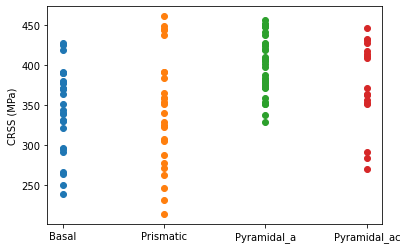

In [83]:
plt.scatter([1]*len(basal), basal, label='Basal')
plt.scatter([2]*len(prismatic), prismatic, label='prismatic')
plt.scatter([3]*len(pyramidal_a), pyramidal_a, label='pyramidal_a')
plt.scatter([4]*len(pyramidal_ac), pyramidal_ac, label='pyramidal_ac')
plt.xticks([1, 2, 3, 4], ['Basal', 'Prismatic', 'Pyramidal_a', 'Pyramidal_ac'])

# Add labels and legend
plt.ylabel('CRSS (MPa)')
#plt.legend()

# Show plot
plt.show()
#violin plot

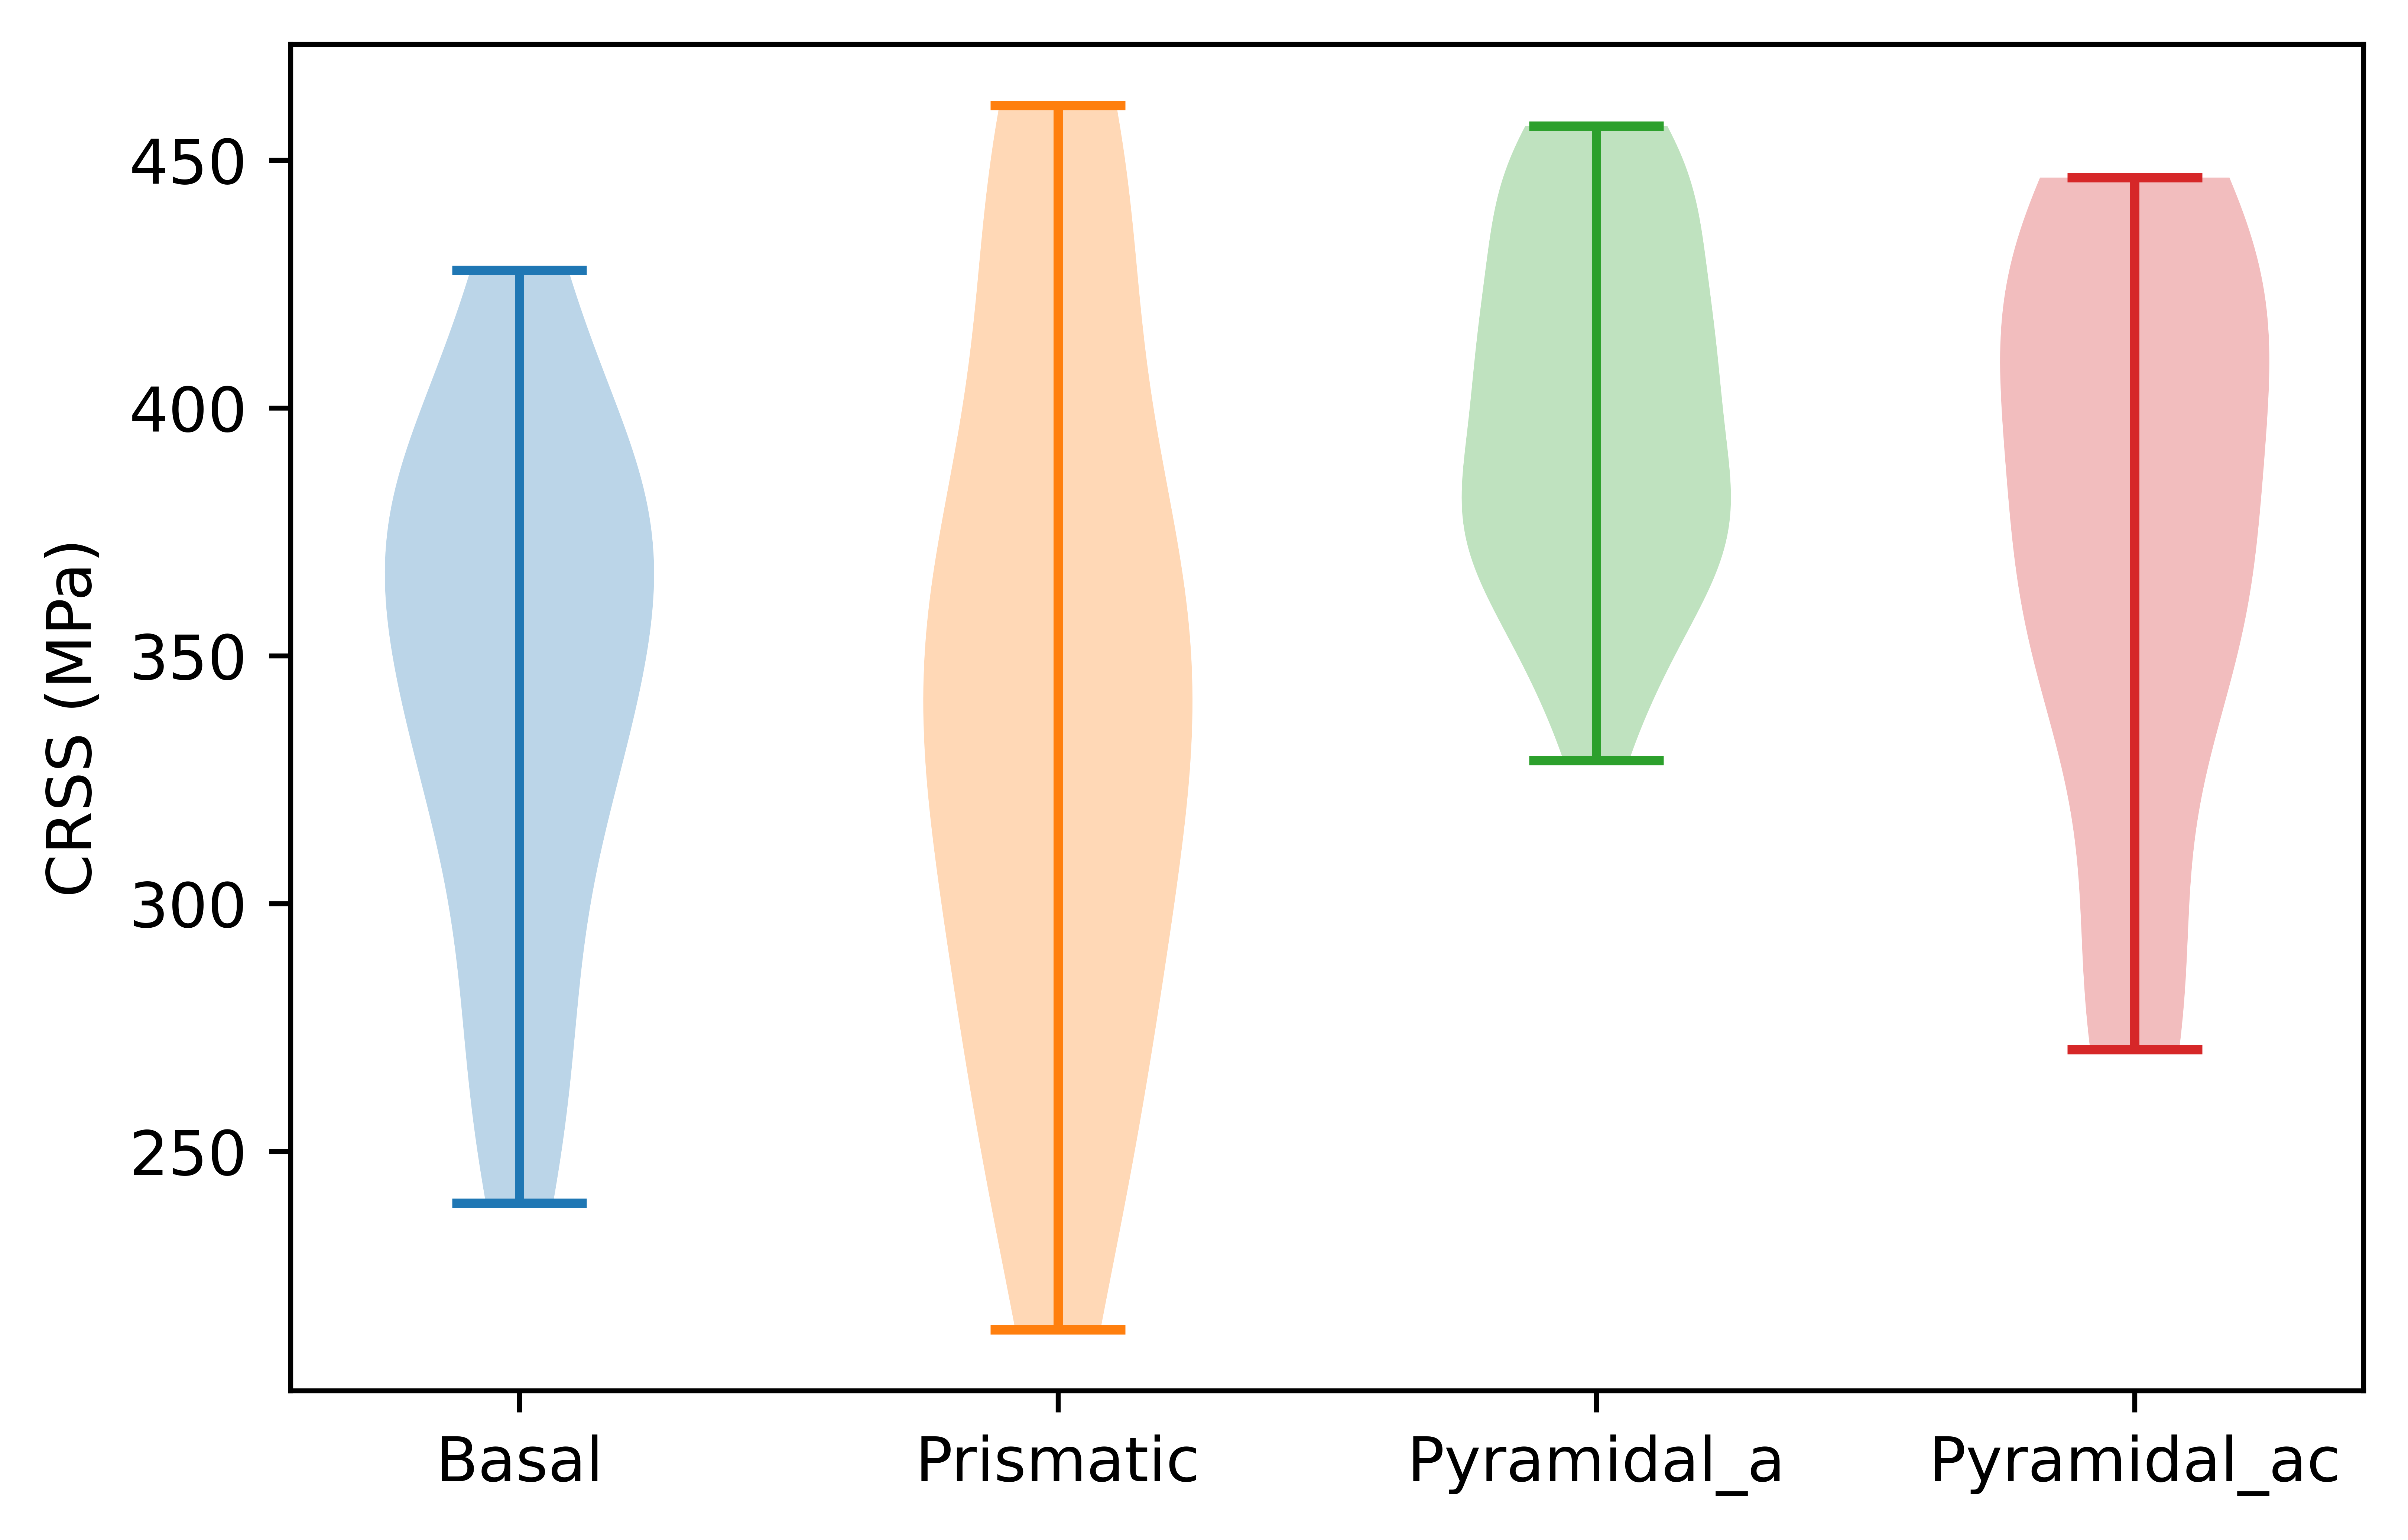

In [87]:
plt.figure(dpi=1200,figsize=(6,4))
plt.violinplot(basal,positions=[1],vert=True)
plt.violinplot(prismatic,positions=[2],vert=True)
plt.violinplot(pyramidal_a,positions=[3],vert=True)
plt.violinplot(pyramidal_ac,positions=[4],vert=True)
plt.ylabel('CRSS (MPa)')
plt.xticks([1, 2, 3, 4], ['Basal', 'Prismatic', 'Pyramidal_a', 'Pyramidal_ac'])
plt.savefig(output+'CRSS_violin_plot.png')

In [89]:
# Create a DataFrame from the list of rows
CRSS_values = pd.DataFrame({'Basal':Basal,'Prismatic':Prismatic,'Pyramidal_a':Pyramidal_a,'Pyramidal_ac':Pyramidal_ac})
CRSS_values.index = ['Min CRSS (MPa)', 'Max CRSS (MPa)', 'Mean CRSS (MPa)', 'STD (MPa)']
#CRSS_values_transposed = CRSS_values.transpose()
print(CRSS_values)

                 Basal  Prismatic  Pyramidal_a  Pyramidal_ac
Min CRSS (MPa)     239        214          328           270
Max CRSS (MPa)     427        461          456           446
Mean CRSS (MPa)    345        342          399           376
STD (MPa)           50         68           34            53


# Literature
Determining the strengths of HCP slip systems using harmonic analyses of lattice strain distributions

ratio : basal 1, prismatic 1.2, pyramidal ac 1.7

basal = 330MPa, prismatic = 396MPa, pyramidal a = N/A, Pyramidal ac = 561MPa


## My results

ratio : basal 1, prismatic 0.9, pyramidal a 1.4, pyramidal ac 1.3


In [46]:
# Create a DataFrame from the list of rows
CRSS_values = pd.DataFrame({'Basal':Basal,'Prismatic':Prismatic,'Pyramidal_a':Pyramidal_a,'Pyramidal_ac':Pyramidal_ac})
CRSS_values.index = ['Min CRSS (MPa)', 'Max CRSS (MPa)', 'Mean CRSS (MPa)', 'STD (MPa)']
#CRSS_values_transposed = CRSS_values.transpose()
print(CRSS_values)

                 Basal  Prismatic  Pyramidal_a  Pyramidal_ac
Min CRSS (MPa)     239        102          328           270
Max CRSS (MPa)     427        461          456           446
Mean CRSS (MPa)    345        334          399           376
STD (MPa)           50         81           34            53
